# Data Understanding

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#loading the data
email=pd.read_csv("Spam.txt",sep=",",header=None)

In [3]:
email.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# renaming Columns
email.columns=["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_;","char_freq_(","char_freq_[","char_freq_!","char_freq_$","char_freq_hash","capital_run_length_average","capital_run_length_longest","capital_run_length_total","spam"]

In [5]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [6]:
email.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [7]:
# describing spam email
email.spam.describe()


count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: spam, dtype: float64

In [8]:
# 39.4 % spam is there

# Data Preparation

In [9]:
# Rescaling the Variable and splitting into test nd train set

In [10]:
email.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [11]:
# Spliting into X and Y
X=email.drop("spam",axis=1)
y=email.spam.values.astype(int)

In [12]:
X.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028


In [13]:
# Scaling features
# Scaling function standardise each columns_    x=x-mean(x)/std(x)
from sklearn.preprocessing import scale
X=scale(X)

In [14]:
X[:1]

array([[-0.34243371,  0.3308849 ,  0.71285877, -0.04689958,  0.01156471,
        -0.35026618, -0.29179389, -0.26256156, -0.32330236, -0.37136439,
        -0.29685953,  0.11408733, -0.31205521, -0.17492717, -0.19011441,
         0.08617144, -0.32113541,  2.08120664,  0.15090537, -0.16789311,
         0.1251284 , -0.11817151, -0.2902092 , -0.21299439, -0.32881467,
        -0.29923993, -0.22789481, -0.23183016, -0.16673145, -0.22523952,
        -0.16053931, -0.14321202, -0.17492026, -0.14521515, -0.19806739,
        -0.24213022, -0.32345561, -0.05983624, -0.18091134, -0.18530385,
        -0.12090468, -0.17259996, -0.20599311, -0.12734332, -0.29777621,
        -0.19738748, -0.0713879 , -0.11154623, -0.15845336, -0.51430655,
        -0.15519768,  0.62400658, -0.30835494, -0.1030484 , -0.04524728,
         0.04529792, -0.00872413]])

In [15]:
# Spliting into X and y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=6)

In [16]:
# confirming that train and test have  similar  distribution of spam and ham emails
print(y_test.mean())
print(y_train.mean())

0.387400434467777
0.3968944099378882


# Model Building

In [17]:
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly

In [18]:
# MOdel Building
# Instantiate an object of class SVC()
#  we are using C=1

In [19]:
model =SVC(C=1)

# fit 
model.fit(X_train,y_train)




SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
y_pred=model.predict(X_test)

In [21]:
# Evaluate the model using Confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[823,  23],
       [ 65, 470]], dtype=int64)

In [22]:
print("accuracy :{}".format(metrics.accuracy_score(y_test,y_pred)))

accuracy :0.9362780593772628


In [23]:
print("precesion :{}".format(metrics.precision_score(y_test,y_pred)))

precesion :0.9533468559837728


In [24]:
print("recall: {}".format(metrics.recall_score(y_test,y_pred)))

recall: 0.8785046728971962


In [25]:
print("specificity :{}".format(823/(823+23)))

specificity :0.9728132387706856


In [26]:
# Interpretation of results.

# 93% of mail are classified correctly.
# 97% of mail are predicted hams and they are hams
# 87% of mail are classfied as spam and they actually spam
# 95% of mail are classied as actually spam out of  predicted spam

In [27]:
# Hyperparameter Tuning 

In [28]:
# help(metrics.confusion_matrix)

# k-FOLD Validation

In [29]:
# USING cross_val_score()

In [30]:
#creating Kfold object with 5 splits
fold =KFold(n_splits=5,shuffle=True,random_state=4)

# instantiating a model with cost=1
model =SVC(C=1)

In [31]:
#computing cross Validation Score
#Cross Validation take 'fold' object and specified accuracy as metrics 

In [32]:
cv_results=cross_val_score(model,X_train,y_train,cv=fold,scoring='accuracy')

In [33]:
print(cv_results)
print("")
print("mean_accuracy:{}".format(cv_results.mean()))

[0.92391304 0.94099379 0.93322981 0.92701863 0.91459627]

mean_accuracy:0.9279503105590061


# Grid Search to find Optimal Hyperparameter C 

K-fold CV helps us compute average metrics over multiple folds, and that is the best indication of the 'test accuracy/other metric scores' we can have. 

But we want to use CV to compute the optimal values of hyperparameters (in this case, the cost C is a hyperparameter). This is done using the ```GridSearchCV()``` method, which computes metrics (such as accuracy, recall etc.) 

In this case, we have only one hyperparameter, though you can have multiple, such as C and gamma in non-linear SVMs. In that case, you need to search through a *grid* of multiple values of C and gamma to find the optimal combination, and hence the name GridSearchCV.

In [34]:
parameters={"C":[0.1,1,10,100,1000]}

model=SVC()

# set up grid search scheme
# Using 5 kfold used before

model_cv=GridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy',verbose=1,cv=fold,return_train_score=True)

In [35]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   22.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=1)

In [37]:
# results of grid Search CV
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.554113,0.023333,0.114758,0.010781,0.1,{'C': 0.1},0.897516,0.908385,0.919255,0.903727,...,0.903727,0.009967,5,0.912655,0.909938,0.906444,0.913432,0.912655,0.911025,0.002580
1,0.384586,0.016210,0.069563,0.007139,1,{'C': 1},0.923913,0.940994,0.933230,0.927019,...,0.927950,0.008871,2,0.951087,0.942935,0.946040,0.949534,0.946429,0.947205,0.002853
2,0.390076,0.073078,0.056243,0.007668,10,{'C': 10},0.927019,0.931677,0.942547,0.919255,...,0.929193,0.007770,1,0.969332,0.965839,0.966615,0.969720,0.965839,0.967469,0.001708
3,0.550013,0.045715,0.049997,0.006247,100,{'C': 100},0.922360,0.922360,0.925466,0.917702,...,0.921739,0.002523,3,0.990295,0.986025,0.986413,0.988742,0.986801,0.987655,0.001617
4,0.876875,0.109646,0.053117,0.007653,1000,{'C': 1000},0.906832,0.908385,0.899068,0.905280,...,0.908696,0.008240,4,0.994953,0.993401,0.993012,0.993401,0.993012,0.993556,0.000720


### To get better sense of how training and test accuracy is varying with C. ploting test and train accuracy against C.

In [38]:
# plot C V/s train and test score 

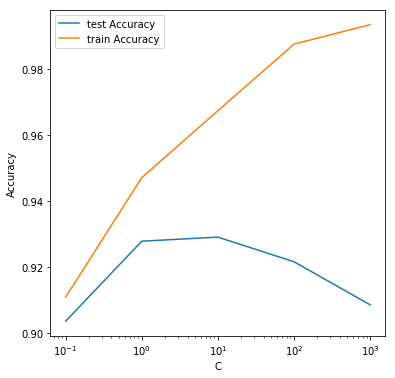

In [40]:
plt.figure(figsize=(6,6))
plt.plot(cv_results.param_C,cv_results.mean_test_score)
plt.plot(cv_results.param_C,cv_results.mean_train_score)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend(["test Accuracy","train Accuracy"],loc='upper left')
plt.xscale("log")
plt.show()

In [41]:
# higher Value of C leads to overfitting the model

In [46]:
# optimal C values find by grid Search:
best_score=model_cv.best_score_
best_C=model_cv.best_params_['C']

In [47]:
print("Highest test accuracy is {} at C={}".format(best_score,best_C))

Highest test accuracy is 0.929192546583851 at C=10


   # MOdel metrics  with  best Corresponding C=10

In [49]:
# model with best C
model_best=SVC(C=best_C)


In [51]:
# fit
model_best.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
# predict
y_pred=model_best.predict(X_test)

In [55]:
# metrics
print("accuracy",metrics.accuracy_score(y_test,y_pred))
print("precision",metrics.precision_score(y_test,y_pred))
print("recall",metrics.recall_score(y_test,y_pred))

accuracy 0.9341057204923968
precision 0.9387351778656127
recall 0.8878504672897196
